Customer_churn_Analysis

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading data and converting to DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# lets check the column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
# Lets know how big our data is.
df.shape
#There are  7043 rows and 21 columns are there

(7043, 21)

In [5]:
#checking the datatype of each column 
print(df.dtypes)

print(df.info())

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Depe

Except Senior citizen, tenure and MonthlyCharges rest all columns are objects or categorical.
Total charges should be ideally numerical, However we will convert it to float.

In [6]:
# Converting TotalCharges to Numeric values
# 'coerce'- invalid parsing will be set as Nan
df.TotalCharges= pd.to_numeric(df.TotalCharges,errors='coerce')

In [7]:

# Our target variable is categorical and majority is 'NO'
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
# Lets check the statistical info for numerical data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
# information of categorical value.
df.describe(include=['object', 'bool'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,0836-SEYLU,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


There is no missing values identified in both numeric and categoric

In [10]:
# Checking the values in each column
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [11]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [12]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [13]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [14]:
# Dropping the irrelevnt column CustomerID and tenure
df.drop(columns=['customerID','tenure'], axis=1,inplace=True)

In [15]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [16]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [17]:
df['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [18]:
#EDA

# Checking for null values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We have 11 null values in TotalCharges column.

In [19]:
# Since missing values are very less, Lets drop the Nan values.
df.dropna(how='any', inplace=True)

VISUALIZATIONS

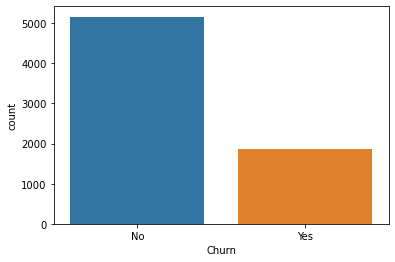

In [20]:
# Plotting the target variable.
sns.countplot(x=df['Churn'])
plt.show()

Churners are more than 70%.
lets evaluate the reasons.

<AxesSubplot:>

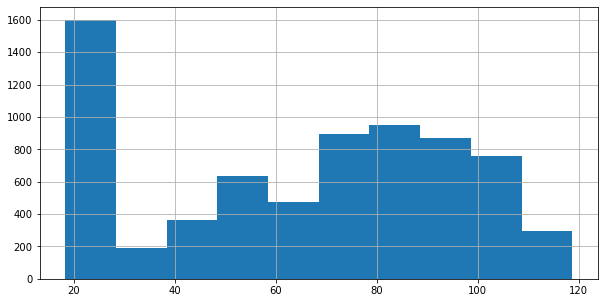

In [21]:
df['MonthlyCharges'].hist(figsize=(10,5))

monthly charges ranges from 18 to 118 approximately.
And majority opted lowest monyhly plans.

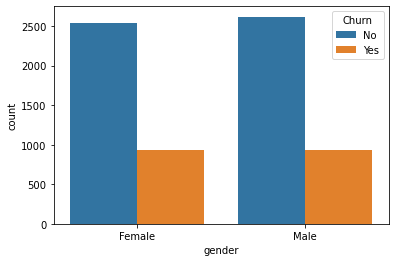

In [22]:
# Churn in the basis of Gender
sns.countplot(x='gender', hue='Churn', data=df)
plt.show()

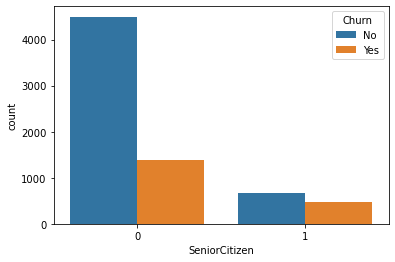

In [23]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.show()

There are chances senior citizen can churn compared to others.

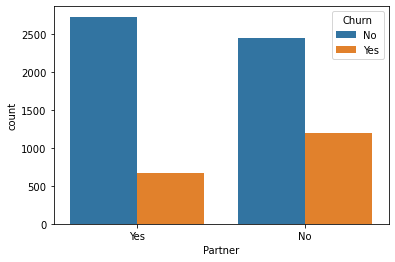

In [24]:
sns.countplot(x='Partner', hue='Churn', data=df)
plt.show()

less likely to churn if there is partner

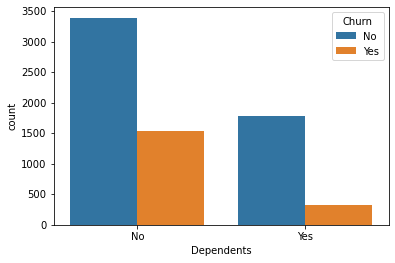

In [25]:
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.show()


less likely to churn if there is dependents

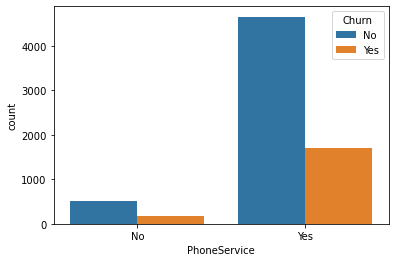

In [26]:
sns.countplot(x='PhoneService', hue='Churn', data=df)
plt.show()

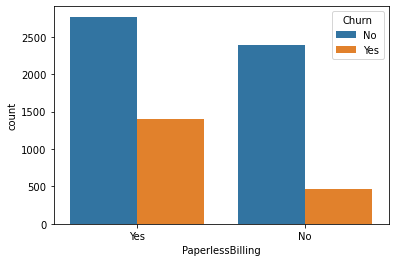

In [27]:
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.show()

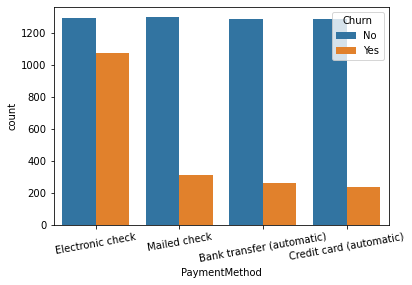

In [28]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xticks(rotation=10)
plt.show()

Churners are more whose payment methods are by means of Electronic check.

In [29]:
# For modelling we need to convert Target variable to binary
# Discreet value integer encoder
label_encoder = LabelEncoder()
df['Churn'] = label_encoder.fit_transform(df['Churn'])

In [30]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [31]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Dependents"]=encoder.fit_transform(df['Dependents'])
df["PhoneService"]=encoder.fit_transform(df['PhoneService'])
df["MultipleLines"]=encoder.fit_transform(df['MultipleLines'])
df["InternetService"]=encoder.fit_transform(df['InternetService'])
df["OnlineSecurity"]=encoder.fit_transform(df['OnlineSecurity'])
df["OnlineBackup"]=encoder.fit_transform(df['OnlineBackup'])
df["DeviceProtection"]=encoder.fit_transform(df['DeviceProtection'])
df["TechSupport"]=encoder.fit_transform(df['TechSupport'])
df["StreamingTV"]=encoder.fit_transform(df['StreamingTV'])
df["StreamingMovies"]=encoder.fit_transform(df['StreamingMovies'])
df["Contract"]=encoder.fit_transform(df['Contract'])
df["PaperlessBilling"]=encoder.fit_transform(df['PaperlessBilling'])
df["PaymentMethod"]=encoder.fit_transform(df['PaymentMethod'])
df["Churn"]=encoder.fit_transform(df['Churn'])
df["Partner"]=encoder.fit_transform(df['Partner'])
df["gender"]=encoder.fit_transform(df['gender'])

In [32]:
#Modelling

df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [33]:
# Creating dependent and independent variable.
y= df['Churn']
x= df.drop('Churn', axis=1)

In [34]:

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.22,random_state=1)

In [35]:
#DECISIONTREE CLASSIFIER
dtc= DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6,min_samples_leaf=8)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Cofusion Matrix:",confusion_matrix(y_test,preddtc))
print("Classification Report:",classification_report(y_test,preddtc))
print("Accuracy Score:",accuracy_score(y_test,preddtc))

Cofusion Matrix: [[1028  110]
 [ 209  201]]
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1138
           1       0.65      0.49      0.56       410

    accuracy                           0.79      1548
   macro avg       0.74      0.70      0.71      1548
weighted avg       0.78      0.79      0.78      1548

Accuracy Score: 0.7939276485788114


In [36]:
# Cross Validating DTC
scr3= cross_val_score( dtc,x,y, cv=10)
print("Cross Validated score for DTC is:",scr3.mean())

Cross Validated score for DTC is: 0.7827106637139531


In [37]:
#RANDOMFOREST CLASSIFIER
rfc= RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100,max_depth=6,min_samples_leaf=8)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train) #Accuracy score on train data
predrfc= rfc.predict(x_test)
# Confusion matrix and accuracy score on test data
print("Confusion Matrix:",confusion_matrix(y_test,predrfc))
print("Classification Report:",classification_report(y_test,predrfc))
print("Accuracy score:",accuracy_score(y_test, predrfc))

Confusion Matrix: [[1048   90]
 [ 220  190]]
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1138
           1       0.68      0.46      0.55       410

    accuracy                           0.80      1548
   macro avg       0.75      0.69      0.71      1548
weighted avg       0.79      0.80      0.79      1548

Accuracy score: 0.7997416020671835


In [38]:
# Cross Validated score for Logistic Regression
scr1= cross_val_score( rfc,x,y, cv=10)
print("Cross Validated score for rfc is:",scr1.mean())

Cross Validated score for rfc is: 0.7997716765808871


In [40]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression 
lg= LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train) 
predlg= lg.predict(x_test)

print("Confusion Matrix:",confusion_matrix(y_test,predlg))
print("Classification Report:",classification_report(y_test,predlg))
#print("Accuracy score:",accuracy_score(y_test, predlr))

Confusion Matrix: [[1014  124]
 [ 194  216]]
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1138
           1       0.64      0.53      0.58       410

    accuracy                           0.79      1548
   macro avg       0.74      0.71      0.72      1548
weighted avg       0.79      0.79      0.79      1548



In [41]:
# Cross Validated score for Logistic Regression
scr1= cross_val_score( lg,x,y, cv=10)
print("Cross Validated score for LR is:",scr1.mean())

Cross Validated score for LR is: 0.7959336205224362


In [42]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
ada.score(x_train,y_train) #Accuracy score on train data
predlr= ada.predict(x_test)
# Confusion matrix and accuracy score on test data
print("Confusion Matrix:",confusion_matrix(y_test,predlr))
print("Classification Report:",classification_report(y_test,predlr))
print("Accuracy score:",accuracy_score(y_test, predlr))

Confusion Matrix: [[1033  105]
 [ 206  204]]
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1138
           1       0.66      0.50      0.57       410

    accuracy                           0.80      1548
   macro avg       0.75      0.70      0.72      1548
weighted avg       0.79      0.80      0.79      1548

Accuracy score: 0.7990956072351422


In [43]:
# Cross Validated score for AdaBoostClassifier
scr1= cross_val_score( ada,x,y, cv=10)
print("Cross Validated score for adaboost  is:",scr1.mean())

Cross Validated score for adaboost  is: 0.8013345806931333


In [44]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gdr=GradientBoostingClassifier()
gdr.fit(x_train,y_train)
gdr.score(x_train,y_train) #Accuracy score on train data
predlr= ada.predict(x_test)
# Confusion matrix and accuracy score on test data
print("Confusion Matrix:",confusion_matrix(y_test,predlr))
print("Classification Report:",classification_report(y_test,predlr))
print("Accuracy score:",accuracy_score(y_test, predlr))

Confusion Matrix: [[1033  105]
 [ 206  204]]
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1138
           1       0.66      0.50      0.57       410

    accuracy                           0.80      1548
   macro avg       0.75      0.70      0.72      1548
weighted avg       0.79      0.80      0.79      1548

Accuracy score: 0.7990956072351422


In [45]:
# Cross Validated score for GradientBoostingClassifier
scr1= cross_val_score( gdr,x,y, cv=10)
print("Cross Validated score for GradientBoostingClassifier  is:",scr1.mean())

Cross Validated score for GradientBoostingClassifier  is: 0.8013363991982413


In [46]:
#Since GradientBoostingClassifier is performing best so we will save it as final model
import pickle
# save the model to disk
filename = 'Telecom_Cus_Churn.pkl'
pickle.dump(gdr,open(filename,'wb'))
